## Working with a lager example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classes, it's multi-class classification
* It also means if you have 100 different classes, it;s multi-class classification

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [159]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [6]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [12]:
print(type(train_data))
print(train_data.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [9]:
# Show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [115]:
# create a small list so we can index onto our training labels so they are human readable
class_names = ["t-shirt/top",
              "trouser",
               "pullover",
               "dress",
               "coat",
               "sandal",
               "shirt",
               "sneaker",
               "bag",
               "ankle boot",
              ]

Text(0.5, 1.0, 't-shirt/top')

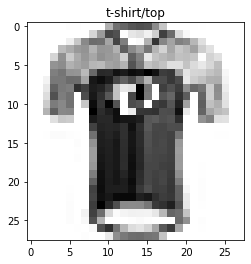

In [126]:
random_number = np.random.randint(0,60000,1)
plt.imshow(train_data[random_number[0]],cmap = plt.cm.binary)
plt.title(class_names[train_labels[random_number[0]]])

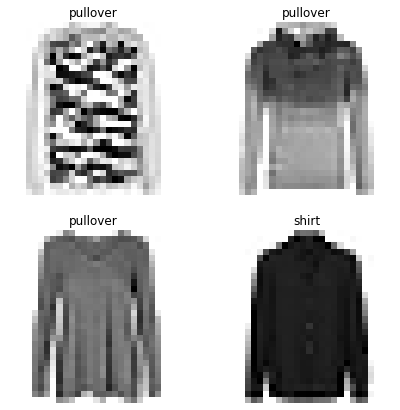

In [131]:
# Plot multiple random images
import random
plt.figure(figsize = (7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index],cmap = plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False) # don't display stick

## Building-multi classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, However we are going to tweak few things:

* Input shpe = 28 x 28 (the shape of one image)

* Output shape = 10 (one per class of clothing)

* Loss function = tf.keras.CategoricalCrossentropy()
    
    - If your labels are one-hot encoded, use CategoricalCrossentropy
    
    - If your labels integer form, use SparseCategorialCrossentropy

* Output layer activation = Softmax (not signmoid)

In [149]:
# our data needs to be flattened (from 28x28 to None,28*28)
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28))
])
flatten_model.output_shape

(None, 784)

In [150]:
28*28

784

In [161]:
tf.one_hot(train_labels[:10],depth = 10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [164]:
# set the random seed
tf.random.set_seed(42)
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape), # pass the image 28x28
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])
# fit the model
non_norm_history = model.fit(train_data,
                             train_labels,
                             epochs =100,
                             verbose =1,
                             validation_data = (test_data,test_labels))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1655 - accuracy: 0.1610 - val_loss: 1.7964 - val_accuracy: 0.2112
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7028 - accuracy: 0.2535 - val_loss: 1.6496 - val_accuracy: 0.2914
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6321 - accuracy: 0.2844 - val_loss: 1.5998 - val_accuracy: 0.2859
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6055 - accuracy: 0.2948 - val_loss: 1.6007 - val_accuracy: 0.3142
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5959 - accuracy: 0.3067 - val_loss: 1.5778 - val_accuracy: 0.3271
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5823 - accuracy: 0.3209 - val_loss: 1.5779 - val_accuracy: 0.3348
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5818 - accuracy: 0.3225 - val_loss: 1.5588 - val_ac

1875/1875 [==============================] - 3s 2ms/step - loss: 1.5573 - accuracy: 0.3398 - val_loss: 1.5565 - val_accuracy: 0.3401
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5435 - accuracy: 0.3388 - val_loss: 1.5401 - val_accuracy: 0.3453
Epoch 59/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5400 - accuracy: 0.3414 - val_loss: 1.5433 - val_accuracy: 0.3396
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5434 - accuracy: 0.3362 - val_loss: 1.5529 - val_accuracy: 0.3363
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5454 - accuracy: 0.3350 - val_loss: 1.5456 - val_accuracy: 0.3325
Epoch 62/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5504 - accuracy: 0.3359 - val_loss: 1.5445 - val_accuracy: 0.3379
Epoch 63/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5469 - accuracy: 0.3387 - val_loss: 1.5594 - val_accuracy

<AxesSubplot:>

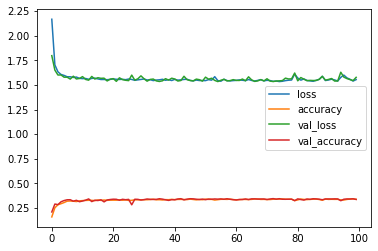

In [166]:
pd.DataFrame(non_norm_history.history).plot()

In [167]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [168]:
# set the random seed
tf.random.set_seed(42)
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data[0].shape), # pass the image 28x28
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
# compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])
# fit the model
non_norm_history = model.fit(train_data,
                             tf.one_hot(train_labels,depth = 10),
                             epochs =10,
                             verbose =1,
                             validation_data = (test_data,tf.one_hot(test_labels,depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1655 - accuracy: 0.1610 - val_loss: 1.7964 - val_accuracy: 0.2112
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7028 - accuracy: 0.2535 - val_loss: 1.6496 - val_accuracy: 0.2914
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6321 - accuracy: 0.2844 - val_loss: 1.5998 - val_accuracy: 0.2859
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6055 - accuracy: 0.2948 - val_loss: 1.6007 - val_accuracy: 0.3142
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5959 - accuracy: 0.3067 - val_loss: 1.5778 - val_accuracy: 0.3271
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5823 - accuracy: 0.3209 - val_loss: 1.5779 - val_accuracy: 0.3348
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5818 - accuracy: 0.3225 - val_loss: 1.5588 - val_accuracy:

<AxesSubplot:>

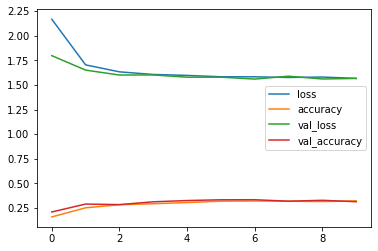

In [169]:
pd.DataFrame(non_norm_history.history).plot()

In [170]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 4)                 3140      
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dense_47 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Normalization

Neural networks prefer data to be scaled (or normalized) this means they like to have numbers in the training and testing data
in between 0 and 1.

In [173]:
#Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

In [174]:
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/train_data.max()
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

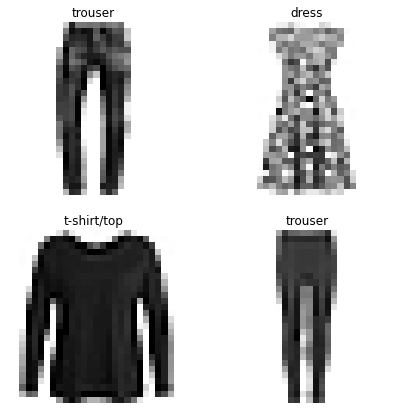

In [192]:
#Visualize the normalized data
plt.figure(figsize = (7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data_norm[random_index],cmap = plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False) # don't display stick

In [193]:
# set the random seed
tf.random.set_seed(42)
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data_norm[0].shape), # pass the image 28x28
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
# compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])
# fit the model
norm_history = model.fit(train_data_norm,
                             tf.one_hot(train_labels,depth = 10),
                             epochs =10,
                             verbose =1,
                             validation_data = (test_data_norm,tf.one_hot(test_labels,depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [194]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_54 (Dense)            (None, 4)                 3140      
                                                                 
 dense_55 (Dense)            (None, 4)                 20        
                                                                 
 dense_56 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

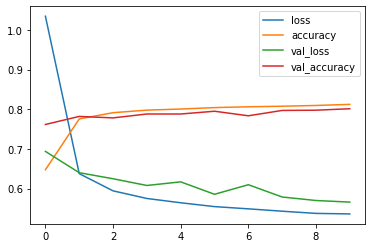

In [195]:
pd.DataFrame(norm_history.history).plot()

<AxesSubplot:title={'center':'not normalized data'}>

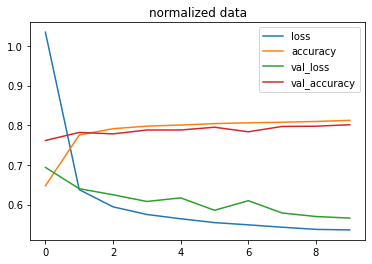

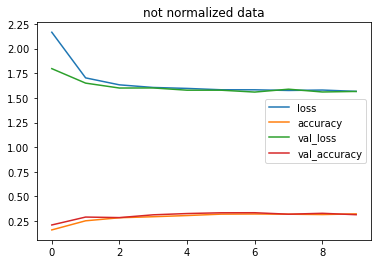

In [197]:
pd.DataFrame(norm_history.history).plot(title = 'normalized data')
pd.DataFrame(non_norm_history.history).plot(title = 'not normalized data')

**Note:** 
- Neural networks tend to prefer data in numerical form as well as scaled/normalized (number between 0-1)
- The same model with even *slightly* different data can produce  *dramatically* different results, So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g same architecture but different data or the same data but different architecture.)

## Finding the ideal learning rate

In [200]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data_norm[0].shape),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax'),
])

# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 ** (epoch/20))

# Fit the model
find_lr_history = model_2.fit(train_data_norm,
                              train_labels,
                              epochs = 40,
                              validation_data = (test_data_norm,test_labels),
                              callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 9s

In [205]:
find_lr_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0.5, 1.0, 'Learning rate versus loss')

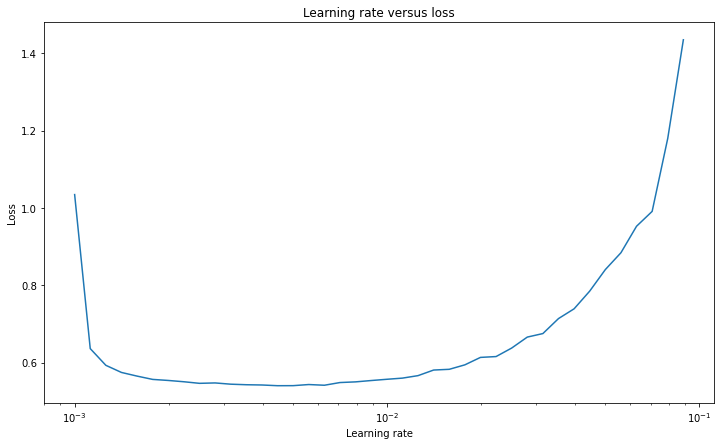

In [206]:
lrs = 1e-3 * 10 ** (tf.range(40)/20)
plt.figure(figsize = (12,7))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate versus loss")

In [216]:
# Let prefit the model with th ideal learning rate
# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = train_data_norm[0].shape),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax'),
])

# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate =0.003),
               metrics = ['accuracy'])

# Fit the model
history = model_2.fit(train_data_norm,
                              train_labels,
                              epochs = 20,
                              validation_data = (test_data_norm,test_labels)
                     )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9032 - accuracy: 0.6842 - val_loss: 0.7058 - val_accuracy: 0.7539
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6655 - accuracy: 0.7708 - val_loss: 0.6508 - val_accuracy: 0.7773
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6294 - accuracy: 0.7830 - val_loss: 0.6392 - val_accuracy: 0.7795
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6064 - accuracy: 0.7908 - val_loss: 0.6454 - val_accuracy: 0.7732
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5930 - accuracy: 0.7958 - val_loss: 0.6208 - val_accuracy: 0.7801
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5793 - accuracy: 0.8007 - val_loss: 0.6088 - val_accuracy: 0.7910
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5681 - accuracy: 0.8047 - val_loss: 0.6082 - val_accuracy:

<AxesSubplot:>

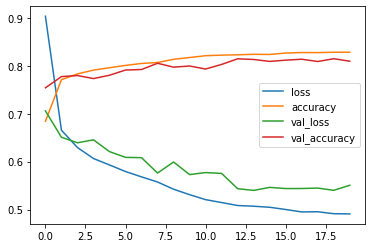

In [217]:
pd.DataFrame(history.history).plot()

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:

* Evaluate its performance using other classification metrics (such as confusion martix)

* Asses some of its predictions (through visualizations)

* Improve its results (by training it for longer or changing the architecture)

* Save and export it for use in an application

In [221]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

In [270]:
y_preds = model_2.predict(test_data_norm,verbose =1)
tf.math.argmax(y_preds,1)

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5], dtype=int64)>

In [271]:
y_preds.argmax(axis = 1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [247]:
predict_labels = []
for i in y_preds:
    predict_labels.append(i.argmax())
predict_labels = np.array(predict_labels).astype('uint8')
predict_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [248]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [251]:
cm = confusion_matrix(test_labels,predict_labels)
cm

array([[641,   5,  20, 103,   9,   1, 198,   0,  23,   0],
       [  1, 948,  15,  30,   4,   0,   1,   0,   1,   0],
       [ 12,   3, 584,  13, 247,   0, 137,   0,   4,   0],
       [ 25,  16,   7, 835,  62,   0,  48,   0,   7,   0],
       [  0,   1,  68,  17, 839,   0,  70,   0,   5,   0],
       [  0,   0,   0,   1,   0, 895,   0,  58,   6,  40],
       [ 91,   3,  71,  47, 199,   0, 558,   0,  31,   0],
       [  0,   0,   0,   1,   0,  18,   0, 960,   2,  19],
       [  2,   0,   2,  14,  17,   4,  42,   3, 916,   0],
       [  0,   0,   0,   0,   0,  19,   2,  61,   0, 918]], dtype=int64)

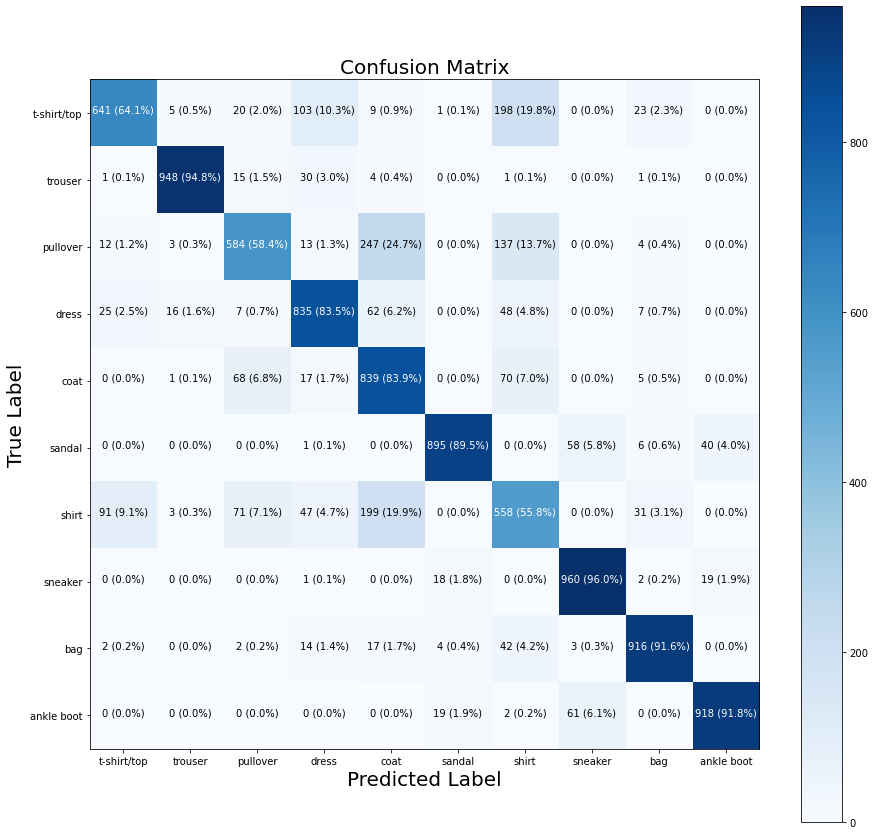

In [264]:
# pretify the confusion matrix
figsize = (15,15)

# create the confusion matrix
cm = confusion_matrix(test_labels,predict_labels)
cm_norm = cm.astype("float") /cm.sum(axis = 1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let prettify it
fig,ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm,cmap = plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = class_names

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title = "Confusion Matrix",
      xlabel = "Predicted Label",
      ylabel = "True Label",
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > threshold else 'black',
             size = 10)

**Note** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the input and outputs of your models

Let create a fun little function for:

* Plot a random image
* Make a predcition on said image
* Label the plot with the truth label & predicted label

1/1 [==============================] - 0s 32ms/step


(-0.5, 27.5, 27.5, -0.5)

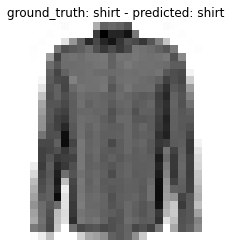

In [312]:
import random 
random_index = random.choice(range(len(test_data_norm)))
y_pred = model_2.predict(tf.expand_dims(test_data_norm[random_index],axis= 0),verbose =1)
predict = y_pred.argmax(axis = 1)[0]
plt.imshow(test_data_norm[random_index],cmap = plt.cm.binary)
plt.title(f'ground_truth: {class_names[test_labels[random_index]]} - predicted: {class_names[predict]}')
plt.axis(False) # don't display stick

In [338]:
def plot_random_image(model,test_images,true_labels,classes):
    '''
    Pick a random image, plots it and labels it with a prediction and thruth label
    '''
    # Set random integer
    random_index = random.choice(range(len(test_images)))
    # Create prediction
    y_pred = model.predict(tf.expand_dims(test_images[random_index],axis= 0),verbose =0)
    predict = y_pred.argmax(axis = 1)[0]
    #Change the color of the titles depending on if prediction is right or wrong
    if predict == true_labels[random_index]:
        color = "green"
    else:
        color = "red"
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(classes[predict],
                                                     100 * tf.reduce_max(y_pred),
                                                     class_names[true_labels[random_index]]
                                                    ),
                                              color = color)
    
    #plt.axis(False) # don't display stick
    plt.imshow(test_images[random_index],cmap = plt.cm.binary)

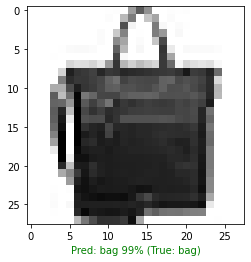

In [343]:
plot_random_image(model_2,test_data_norm,test_labels,classes)

In [340]:
y_pred = model_2.predict(tf.expand_dims(test_data_norm[0],axis= 0),verbose =1)
y_pred.argmax(axis =1)

1/1 [==============================] - 0s 25ms/step


array([9], dtype=int64)

In [288]:
tf.expand_dims(test_data_norm[0],axis= 0).shape

TensorShape([1, 28, 28])

In [325]:
images = test_data_norm[0].reshape(1,28,28)
images.shape

(1, 28, 28)

## What patterns is our model learning
- Every neuron has a bias vector, Each of these is paired with a weights matrix.

- The bias vector also get initialized as zeros (at least at the case of tensorflow)

- The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [345]:
# Find the layers of our most recent model
model_2.layers

In [352]:
model_2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 4)                 3140      
                                                                 
 dense_67 (Dense)            (None, 4)                 20        
                                                                 
 dense_68 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


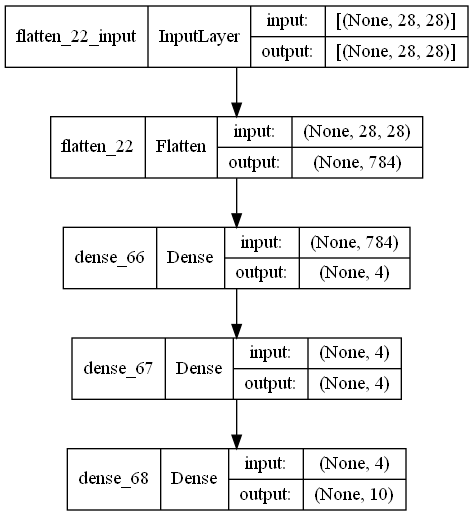

In [346]:
from tensorflow.keras.utils import plot_model

plot_model(model_2,show_shapes = True)

In [347]:
# Extract a particular layer
model_2.layers[1]

In [350]:
# Get the patterns of a layer in our network
weights,biases = model_2.layers[1].get_weights()
# Shapes
weights,weights.shape

(array([[ 0.04192482, -0.3687285 ,  0.02105078,  2.036449  ],
        [ 0.910957  ,  2.151109  , -3.0016139 ,  0.40988615],
        [ 0.09572469,  1.2010555 , -2.0401301 ,  2.6102328 ],
        ...,
        [ 1.6667167 ,  0.28249556, -0.42222148,  0.49295902],
        [ 1.7729613 ,  1.6053892 , -0.1450911 , -0.4347915 ],
        [ 0.19141595,  0.28513512, -1.3259608 ,  1.2281882 ]],
       dtype=float32),
 (784, 4))

In [351]:
biases,biases.shape

(array([5.1555977, 3.1796722, 3.6756458, 2.7115002], dtype=float32), (4,))